/home/kiran/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Epoch: 0050 cost= 0.548310220 W= 1.82356 b= 1.44229
Epoch: 0100 cost= 0.252820700 W= 1.55923 b= 2.26322
Epoch: 0050 cost= 0.116572991 W= 1.37974 b= 2.82067
Epoch: 0100 cost= 0.053750541 W= 1.25785 b= 3.19919
Epoch: 0150 cost= 0.024783779 W= 1.17509 b= 3.45622
Epoch: 0200 cost= 0.011427527 W= 1.11889 b= 3.63076
Optimization Finished!
Training cost= 0.0114275 W= 1.11889 b= 3.63076 



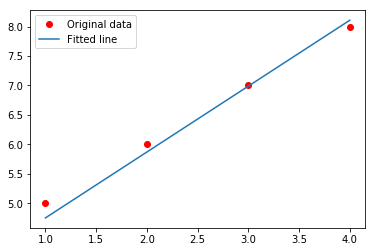

Epoch: 0050 cost= 0.010451964 W= 1.11906 b= 3.64592
Epoch: 0100 cost= 0.009691088 W= 1.11523 b= 3.65916
Epoch: 0050 cost= 0.008989608 W= 1.11105 b= 3.67174
Epoch: 0100 cost= 0.008339141 W= 1.10697 b= 3.68384
Epoch: 0150 cost= 0.007735816 W= 1.10303 b= 3.69549
Epoch: 0200 cost= 0.007176175 W= 1.09923 b= 3.70671
Optimization Finished!
Training cost= 0.00717618 W= 1.09923 b= 3.70671 



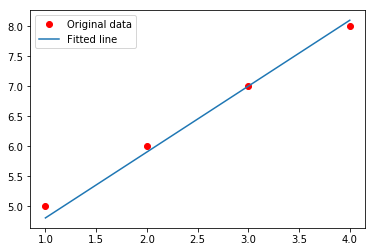

[0.011427527, 0.0071761752]


In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200]
j=[]
learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
        j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
print(j)

/home/kiran/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


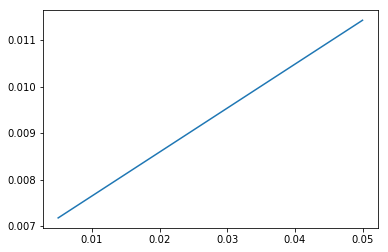

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x_arr=np.array(rate_list)
y_arr=np.array(j)

sess2=tf.Session()
plt.plot(x_arr,y_arr)
plt.legend()
plt.show()

